In [20]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import optuna

In [21]:
class RegressionModels:
    def __init__(self, df, target, scoring, n_trials=10):
        '''
        df 
        target 
        scoring 
        n_trials=10
        '''
        self.df = df
        self.target = target
        self.n_trials = n_trials
        self.X = df.drop(target, axis=1)
        self.y = np.ravel(df[target])
        self.scoring = scoring
        # Tree-based models params info
        self.start_n_estimator = 10
        self.end_n_estimator = 15
        self.start_max_depth = 6
        self.end_max_depth = 16

        self.start_learning_rate = 0.01
        self.end_learning_rate = 1

        self.start_n_neighbors = 5
        self.end_n_neighbors = 10

        self.start_var_smoothing = 1e-9
        self.end_var_smoothing = 1e-5

        # Define study
        # self.study = optuna.create_study(direction="maximize")

    def optimizer(self, model_func):
        study = optuna.create_study(direction="maximize")
        study.optimize(model_func, n_trials=self.n_trials)
        return study

    def random_forest_model(self, trial):
        max_depth = trial.suggest_int("max_depth", self.start_max_depth, self.end_max_depth)
        n_estimator = trial.suggest_int("n_estimator", self.start_n_estimator, self.end_n_estimator)
        model = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimator)
        return cross_val_score(model, self.X, self.y, cv=5, scoring=self.scoring).mean()
    
    def gradient_boosting_model(self, trial):
        max_depth = trial.suggest_int("max_depth", self.start_max_depth, self.end_max_depth)
        n_estimator = trial.suggest_int("n_estimator", self.start_n_estimator, self.end_n_estimator)
        model = GradientBoostingRegressor(max_depth=max_depth, n_estimators=n_estimator)
        return cross_val_score(model, self.X, self.y, cv=5, scoring=self.scoring).mean()


    def run_reg_models(self):
        # return self.optimizer(self.random_forest_model)
        models = {
            'randomforest': self.optimizer(self.random_forest_model),
            'gradientboost': self.optimizer(self.gradient_boosting_model)
        }
        return models

In [22]:
path = './Test_02.csv'
target = 'Potability'
df = pd.read_csv(path)
scoring = 'neg_mean_squared_error'
result = RegressionModels(df, target, scoring, n_trials=5).run_reg_models()

[I 2024-06-27 15:53:26,674] A new study created in memory with name: no-name-b4e8e442-fc8e-41af-8aec-63af864a54e5
[I 2024-06-27 15:53:27,289] Trial 0 finished with value: -0.24530798471142012 and parameters: {'max_depth': 16, 'n_estimator': 14}. Best is trial 0 with value: -0.24530798471142012.
[I 2024-06-27 15:53:27,903] Trial 1 finished with value: -0.24371050004377975 and parameters: {'max_depth': 14, 'n_estimator': 15}. Best is trial 1 with value: -0.24371050004377975.
[I 2024-06-27 15:53:28,390] Trial 2 finished with value: -0.24330875639770064 and parameters: {'max_depth': 10, 'n_estimator': 13}. Best is trial 2 with value: -0.24330875639770064.
[I 2024-06-27 15:53:28,854] Trial 3 finished with value: -0.25255975922909996 and parameters: {'max_depth': 13, 'n_estimator': 11}. Best is trial 2 with value: -0.24330875639770064.
[I 2024-06-27 15:53:29,339] Trial 4 finished with value: -0.25018703981877205 and parameters: {'max_depth': 14, 'n_estimator': 11}. Best is trial 2 with value

In [31]:
best_results = {model: study.best_value for model, study in result.items()}

In [34]:
trial_results = {model: [trial.value for trial in study.get_trials()] for model, study in result.items()}

In [75]:
trial_df = pd.DataFrame(trial_results)
renamed_trial_df = trial_df.rename(columns=lambda x: x + '_mse')

<Axes: >

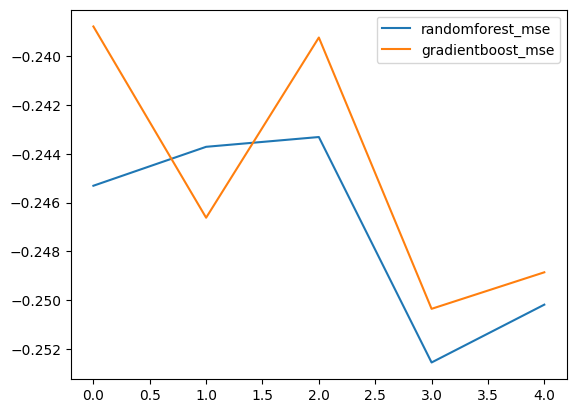

In [77]:
renamed_trial_df.plot()

In [83]:
import pandas as pd

# 예시 데이터 생성
data = {'value': [10, 30, 20, 40, 50]}
df = pd.DataFrame(data)

# value 컬럼에서 최대값 구하기
max_value = df['value'].max()

# 최대값을 가지는 인덱스(들) 구하기
# 인덱스를 reset_index()를 사용하여 리셋하여 문제를 해결할 수 있습니다.
max_indices = df.reset_index().index[df['value'] == max_value].tolist()

print(f"최대값: {max_value}")
print(f"최대값을 가지는 인덱스(들): {max_indices}")


최대값: 50
최대값을 가지는 인덱스(들): [4]


In [69]:
col_name = trial_df.columns
concat_df = []
for col in col_name:
    concat_df.append(trial_df[col])

In [71]:
pd.concat(concat_df)

0   -0.245308
1   -0.243711
2   -0.243309
3   -0.252560
4   -0.250187
0   -0.238773
1   -0.246620
2   -0.239226
3   -0.250358
4   -0.248860
dtype: float64

In [ ]:
trial_results_df = pd.DataFrame.from_dict(trial_results, orient='index', columns=[scoring])
trial_results_df

In [32]:
best_results

{'randomforest': -0.24330875639770064, 'gradientboost': -0.2387729671401031}

In [29]:
result['randomforest'].get_trials()

[FrozenTrial(number=0, state=TrialState.COMPLETE, values=[-0.24530798471142012], datetime_start=datetime.datetime(2024, 6, 27, 15, 53, 26, 675394), datetime_complete=datetime.datetime(2024, 6, 27, 15, 53, 27, 289184), params={'max_depth': 16, 'n_estimator': 14}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=16, log=False, low=6, step=1), 'n_estimator': IntDistribution(high=15, log=False, low=10, step=1)}, trial_id=0, value=None),
 FrozenTrial(number=1, state=TrialState.COMPLETE, values=[-0.24371050004377975], datetime_start=datetime.datetime(2024, 6, 27, 15, 53, 27, 289184), datetime_complete=datetime.datetime(2024, 6, 27, 15, 53, 27, 903142), params={'max_depth': 14, 'n_estimator': 15}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=16, log=False, low=6, step=1), 'n_estimator': IntDistribution(high=15, log=False, low=10, step=1)}, trial_id=1, value=None),
 FrozenTrial(n

In [30]:
result['gradientboost'].get_trials()

[FrozenTrial(number=0, state=TrialState.COMPLETE, values=[-0.2387729671401031], datetime_start=datetime.datetime(2024, 6, 27, 15, 53, 29, 339257), datetime_complete=datetime.datetime(2024, 6, 27, 15, 53, 29, 904077), params={'max_depth': 6, 'n_estimator': 14}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=16, log=False, low=6, step=1), 'n_estimator': IntDistribution(high=15, log=False, low=10, step=1)}, trial_id=0, value=None),
 FrozenTrial(number=1, state=TrialState.COMPLETE, values=[-0.24661983694835637], datetime_start=datetime.datetime(2024, 6, 27, 15, 53, 29, 904077), datetime_complete=datetime.datetime(2024, 6, 27, 15, 53, 30, 423905), params={'max_depth': 8, 'n_estimator': 10}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=16, log=False, low=6, step=1), 'n_estimator': IntDistribution(high=15, log=False, low=10, step=1)}, trial_id=1, value=None),
 FrozenTrial(numb